In [2]:
import os
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

In [3]:
df_train=pd.read_csv("AdvWorksCusts.csv")
ave_spend=pd.read_csv("AW_AveMonthSpend.csv")
bike_buyer=pd.read_csv('AW_BikeBuyer.csv')
df_test=pd.read_csv('AW_test.csv')

In [4]:
df_train.head(5).T


,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [5]:
ave_spend.shape


(16519, 2)

In [6]:
bike_buyer.head(5).T


,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
BikeBuyer,0,1,0,0,1


In [7]:
bike_buyer.shape


(16519, 2)

In [8]:
df_test.head(5).T


,0,1,2,3,4
CustomerID,18988,29135,12156,13749,27780
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Courtney,Adam,Bonnie,Julio,Christy
MiddleName,A,C,NaN,C,A
LastName,Baker,Allen,Raji,Alonso,Andersen
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,8727 Buena Vista Ave.,3491 Cook Street,359 Pleasant Hill Rd,8945 Euclid Ave.,"42, boulevard Tremblay"
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Fremont,Haney,Burbank,Burlingame,Dunkerque
StateProvinceName,California,British Columbia,California,California,Nord


In [9]:
print('Shape before merging Data:', df_train.shape)
df_train=pd.merge(df_train,bike_buyer,how='inner', on='CustomerID')
print('Shape After merging Data:', df_train.shape)

Shape before merging Data: (16519, 23)
Shape After merging Data: (16749, 24)


In [10]:
print('Shape before dropping duplicates', df_train.shape)
df_train.drop_duplicates(subset='CustomerID', keep='last')
print('Shape after dropping duplicates', df_train.shape)

Shape before dropping duplicates (16749, 24)
Shape after dropping duplicates (16749, 24)


In [11]:
df_train.head(5).T


,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [12]:
df_train.describe()


,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
count,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000
mean,20222.633112,0.673473,1.503433,0.993791,2.009613,78109.602185,0.332020
std,5346.696692,0.468957,1.138620,1.516555,1.683549,39678.696234,0.470952
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,0.000000
25%,15580.000000,0.000000,1.000000,0.000000,0.000000,47787.000000,0.000000
50%,20200.000000,1.000000,2.000000,0.000000,2.000000,76120.000000,0.000000
75%,24857.000000,1.000000,2.000000,2.000000,3.000000,105179.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,1.000000


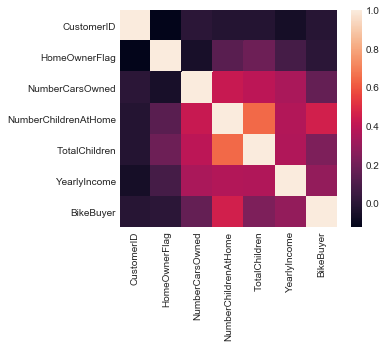

In [13]:
#Heat map
corrmat= df_train.corr()
f, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

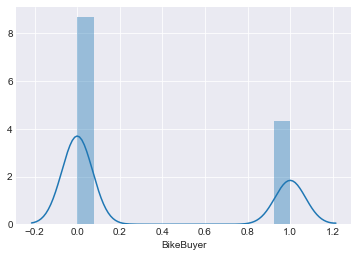

In [14]:
sns.distplot(bike_buyer['BikeBuyer'])


In [15]:
df_train.describe(include=[np.object, pd.Categorical]).T


,count,unique,top,freq
Title,88,5,Mr.,43
FirstName,16749,662,Isabella,91
MiddleName,9696,44,L,1178
LastName,16749,363,Diaz,193
Suffix,2,1,Jr.,2
AddressLine1,16749,11879,Attaché de Presse,18
AddressLine2,281,154,Verkaufsabteilung,28
City,16749,270,London,379
StateProvinceName,16749,52,California,4023
CountryRegionName,16749,6,United States,7088


In [16]:
df_train['Occupation'].value_counts()


Professional      5045
Skilled Manual    4119
Management        2766
Clerical          2663
Manual            2156
Name: Occupation, dtype: int64

In [17]:
##Obtaining the average for the features in the Occupation column
df_train["BirthDate"]=pd.to_datetime(df_train['BirthDate'], infer_datetime_format=True)
df_train['year']=df_train['BirthDate'].dt.year

In [18]:
df_train['Age']=1998-df_train['year']
df_train.head(5).T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [19]:
df_test["BirthDate"]=pd.to_datetime(df_test['BirthDate'], infer_datetime_format=True)
df_test['year']=df_test['BirthDate'].dt.year
df_test['Age']=1998-df_test['year']
df_test.head(5).T

,0,1,2,3,4
CustomerID,18988,29135,12156,13749,27780
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Courtney,Adam,Bonnie,Julio,Christy
MiddleName,A,C,NaN,C,A
LastName,Baker,Allen,Raji,Alonso,Andersen
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,8727 Buena Vista Ave.,3491 Cook Street,359 Pleasant Hill Rd,8945 Euclid Ave.,"42, boulevard Tremblay"
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Fremont,Haney,Burbank,Burlingame,Dunkerque
StateProvinceName,California,British Columbia,California,California,Nord


In [20]:
cars={0:'No cars', 1:'>1 cars', 2:'>1 cars', 3:'>3 cars', 4:'>3 cars'}
dataset=[df_train, df_test]
for data in dataset:
    data['NumberCarsOwned']=data['NumberCarsOwned'].replace(cars)

In [21]:
df_train.head(5)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,year,Age
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,M,M,1,No cars,0,2,137947,0,1966,32
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,M,S,0,>1 cars,3,3,101141,1,1965,33
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,M,M,1,>1 cars,3,3,91945,0,1965,33
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,F,S,0,>1 cars,0,0,86688,0,1968,30
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,F,S,1,>3 cars,5,5,92771,1,1968,30


In [22]:
dataset=[df_train, df_test]
for data in dataset:
    del data['year']

In [23]:
df_train.columns


Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'Age'],
      dtype='object')

In [24]:
child={0:'No Children', 1:'More than 1', 2:'More than 1', 3:'More than 1', 4:'More than 1', 5:'More than 1'}
dataset=[df_train, df_test]
for data in dataset:
    data['TotalChildren']=data['TotalChildren'].replace(child)

In [25]:
columns=['CustomerID','CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 
         'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome','BikeBuyer', 'Age']
train=df_train[columns]

cols=['CustomerID','CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 
      'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age']
test=df_test[cols]

In [26]:
test.head(5)


,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,United States,Bachelors,Management,F,S,0,>1 cars,0,More than 1,86931,53
1,29135,Canada,Bachelors,Skilled Manual,M,M,1,>1 cars,2,More than 1,100125,34
2,12156,United States,Graduate Degree,Management,F,M,1,>1 cars,0,More than 1,103985,64
3,13749,United States,Graduate Degree,Skilled Manual,M,M,1,No cars,0,More than 1,127161,40
4,27780,France,High School,Manual,F,M,1,>1 cars,2,More than 1,21876,33


In [27]:
train.head(5)


,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,11000,Australia,Bachelors,Professional,M,M,1,No cars,0,More than 1,137947,0,32
1,11001,Australia,Bachelors,Professional,M,S,0,>1 cars,3,More than 1,101141,1,33
2,11002,Australia,Bachelors,Professional,M,M,1,>1 cars,3,More than 1,91945,0,33
3,11003,Australia,Bachelors,Professional,F,S,0,>1 cars,0,No Children,86688,0,30
4,11004,Australia,Bachelors,Professional,F,S,1,>3 cars,5,More than 1,92771,1,30


In [28]:
train.shape


(16749, 13)

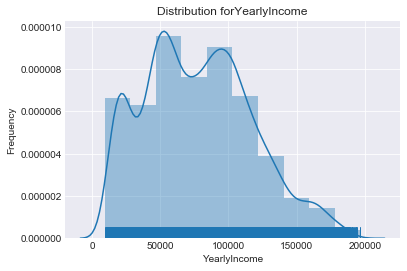

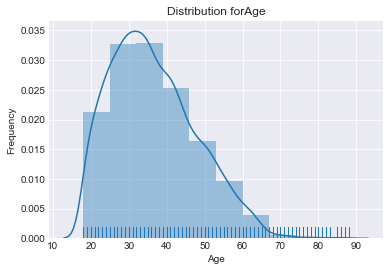

In [29]:
##Observing Data to perform Data Transformation
column=['YearlyIncome', 'Age']
def distplot(df, column, bins = 10, hist = False):
    for col in column:
        sns.distplot(df[col], bins=bins, rug=True, hist=hist)
        plt.title('Distribution for' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

distplot(train, column, hist= True)

In [30]:
train['Age']=np.log(train['Age'])
train['YearlyIncome']=(train['YearlyIncome'])**0.5

In [31]:
test['Age']=np.log(test['Age'])
test['YearlyIncome']=(test['YearlyIncome'])**0.5

In [32]:
train.head()

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,11000,Australia,Bachelors,Professional,M,M,1,No cars,0,More than 1,371.412170,0,3.465736
1,11001,Australia,Bachelors,Professional,M,S,0,>1 cars,3,More than 1,318.026728,1,3.496508
2,11002,Australia,Bachelors,Professional,M,M,1,>1 cars,3,More than 1,303.224339,0,3.496508
3,11003,Australia,Bachelors,Professional,F,S,0,>1 cars,0,No Children,294.428260,0,3.401197
4,11004,Australia,Bachelors,Professional,F,S,1,>3 cars,5,More than 1,304.583322,1,3.401197


In [33]:
train['CountryRegionName'].value_counts()

United States     7088
Australia         3263
United Kingdom    1727
France            1624
Germany           1610
Canada            1437
Name: CountryRegionName, dtype: int64

In [34]:
test['CountryRegionName'].value_counts()

United States     225
Australia          86
Germany            49
Canada             49
France             47
United Kingdom     44
Name: CountryRegionName, dtype: int64

In [35]:
col=['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus','NumberCarsOwned', 
        'NumberChildrenAtHome','TotalChildren']
train=pd.get_dummies(train, prefix=col, columns=col)
test=pd.get_dummies(test, prefix=col, columns=col)

In [36]:
train.columns

Index(['CustomerID', 'HomeOwnerFlag', 'YearlyIncome', 'BikeBuyer', 'Age',
       'CountryRegionName_Australia', 'CountryRegionName_Canada',
       'CountryRegionName_France', 'CountryRegionName_Germany',
       'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
       'Education_Bachelors ', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
       'MaritalStatus_S', 'NumberCarsOwned_>1 cars', 'NumberCarsOwned_>3 cars',
       'NumberCarsOwned_No cars', 'NumberChildrenAtHome_0',
       'NumberChildrenAtHome_1', 'NumberChildrenAtHome_2',
       'NumberChildrenAtHome_3', 'NumberChildrenAtHome_4',
       'NumberChildrenAtHome_5', 'TotalChildren_More than 1',
       'TotalChildren_No Children'],
      dtype='objec

In [37]:
print('Shape of train', train.shape)
print('Shape of test', test.shape)

Shape of train (16749, 36)
Shape of test (500, 35)


Text(0.5,1,'Correlation Matrix')

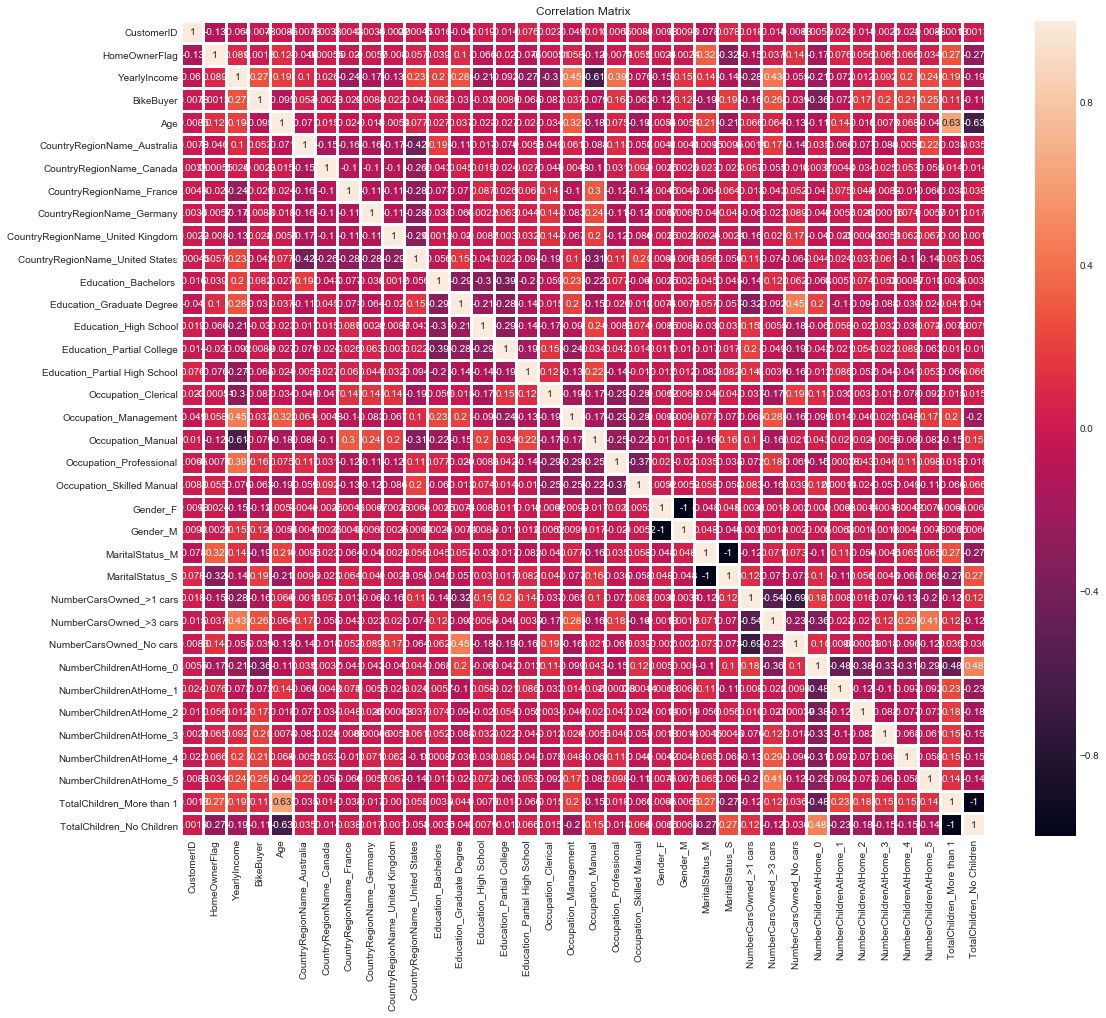

In [38]:
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(train.corr(),linewidth=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')

In [41]:
##Splitting and Applying Algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn.metrics as sklm
from math import sqrt

In [42]:
feature_col=['HomeOwnerFlag', 'YearlyIncome', 'Age',
       'CountryRegionName_Australia', 'CountryRegionName_Canada',
       'CountryRegionName_France', 'CountryRegionName_Germany',
       'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
       'Education_Bachelors ', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
       'MaritalStatus_S', 'NumberCarsOwned_>1 cars', 'NumberCarsOwned_>3 cars',
       'NumberCarsOwned_No cars', 'NumberChildrenAtHome_More than 1',
       'NumberChildrenAtHome_No Children', 'TotalChildren_More than 1',
       'TotalChildren_No Children']
predicted_class_names=['BikeBuyer']
X=train[feature_col].values
y=train[predicted_class_names].values 
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

KeyError: "['NumberChildrenAtHome_More than 1' 'NumberChildrenAtHome_No Children'] not in index"